In [2]:
# Import all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import all the libraries for my Analysis

from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df = pd.read_csv('titanic_train.csv', index_col="PassengerId")
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
df.isnull()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,True,False,False,False,False,True,False


<AxesSubplot:ylabel='PassengerId'>

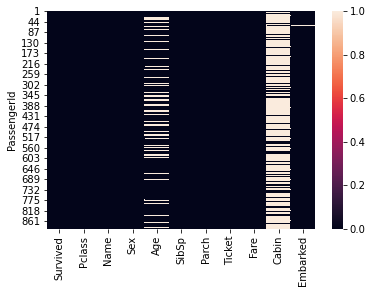

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Assumptions

##### Pclass = Independent/ Dependent
#### Name = independent ----- to be removed
####  Sex = independent
####  Age = independent/ Dependent
####  SibSp = dependent
#### Parch = independent
#### Ticket = independent
#### fare = independent
#### Cabin =too many missing Values -------to be removed
#### Embarked = independent

<AxesSubplot:xlabel='Survived', ylabel='count'>

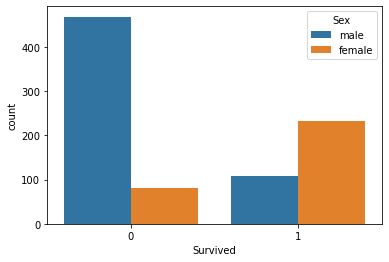

In [9]:
sns.countplot(x ='Survived',hue= 'Sex', data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

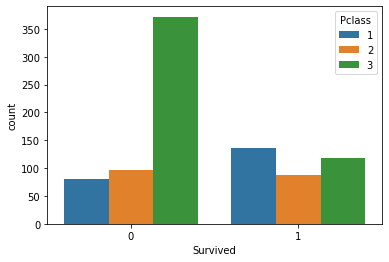

In [10]:
sns.countplot(x ='Survived',hue= 'Pclass', data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

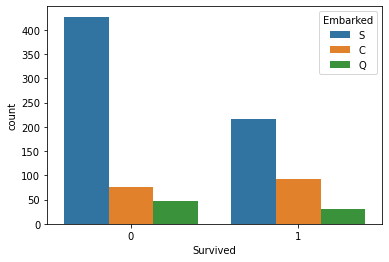

In [11]:
sns.countplot(x ='Survived',hue= 'Embarked', data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

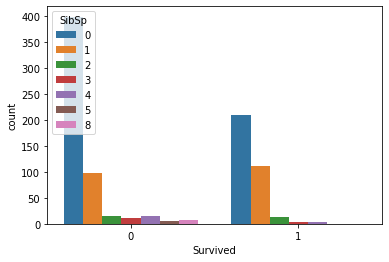

In [12]:
sns.countplot(x ='Survived',hue= 'SibSp', data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

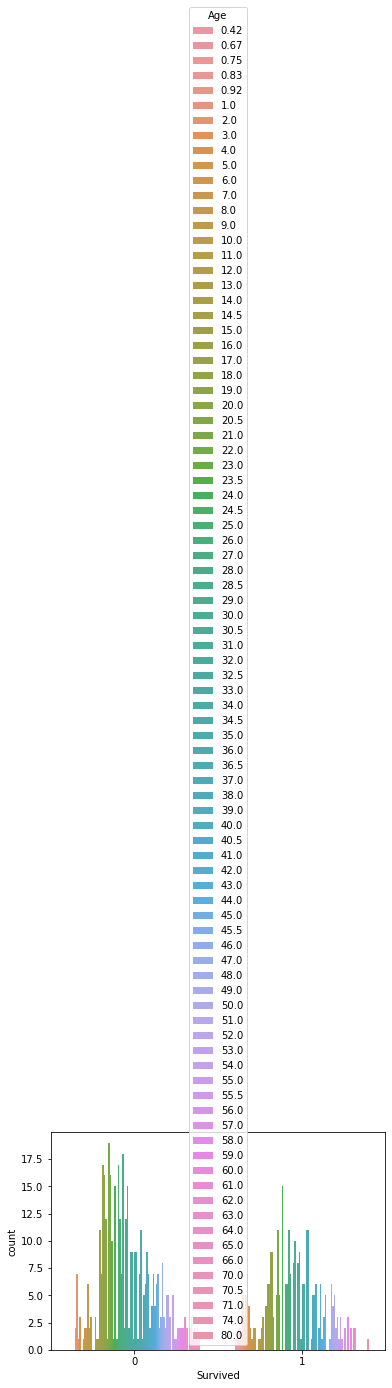

In [13]:
sns.countplot(x ='Survived',hue= 'Age', data = df)

<AxesSubplot:xlabel='Age', ylabel='Survived'>

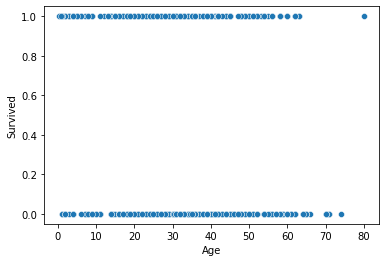

In [14]:
sns.scatterplot(x = 'Age', y ='Survived', data = df)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

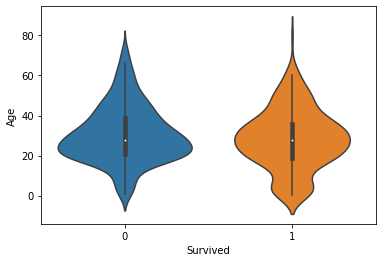

In [15]:
sns.violinplot(x = 'Survived', y ='Age', data = df )

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

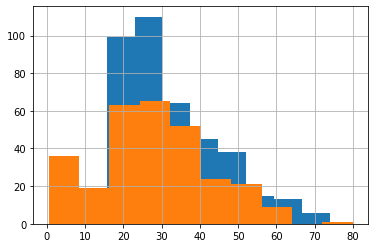

In [16]:
df.groupby('Survived').Age.hist()

<AxesSubplot:xlabel='Survived', ylabel='count'>

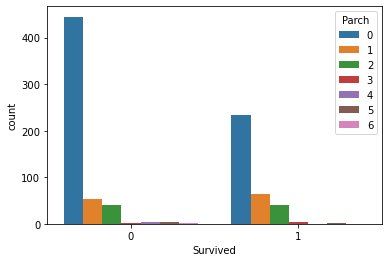

In [17]:
sns.countplot(x = 'Survived', hue ='Parch', data = df )

In [18]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## Assumptions reality check

##### Pclass = Dependent
####  Sex = dependent
#### Embarked = dependent
####  SibSp = dependent
#### Parch = dependent
#### fare = independent/ Dependent
####  Age = Dependent

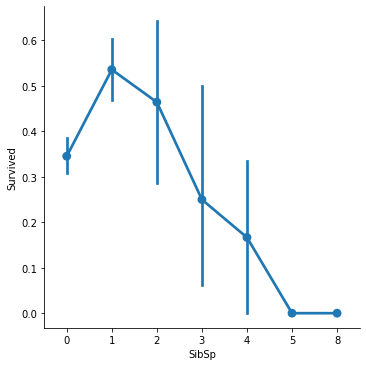

In [19]:
sns.catplot(x = 'SibSp', y= 'Survived', data = df, kind= 'point')

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


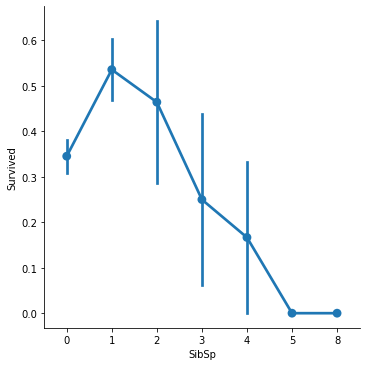

In [20]:
sns.factorplot(x = 'SibSp', y= 'Survived', data = df)

Text(0, 0.5, 'Number of people')

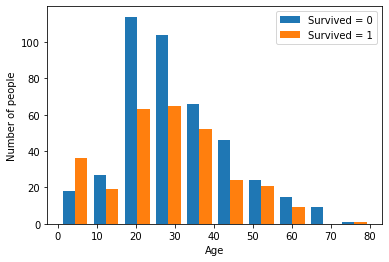

In [21]:
plt.hist([df.loc[df['Survived'] == 0, 'Age'].values,df.loc[df['Survived'] == 1, 'Age'].values], label= ['Survived = 0', 'Survived = 1'])
plt.legend()
plt.xlabel('Age')
plt.ylabel('Number of people')

Text(0, 0.5, 'Number of people')

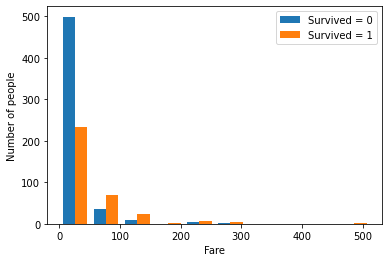

In [22]:
plt.hist([df.loc[df['Survived'] == 0, 'Fare'].values,df.loc[df['Survived'] == 1, 'Fare'].values], label= ['Survived = 0', 'Survived = 1'])
plt.legend()
plt.xlabel('Fare')
plt.ylabel('Number of people')

In [23]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [24]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [25]:
df = df.drop(['Cabin'], axis = 1)

In [26]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [27]:
mode_embarked= df['Embarked'].mode()
mode_embarked

0    S
dtype: object

In [28]:
type(mode_embarked)

pandas.core.series.Series

In [29]:
mode_embarked[0]

'S'

In [30]:
df['Embarked'] = df['Embarked'].fillna(mode_embarked[0])

In [31]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

In [32]:
df['Age'].mean()

29.69911764705882

In [33]:
df[df['Sex'] == 'female']['Age'].mean()

27.915708812260537

In [34]:
df[df['Sex'] == 'male']['Age'].mean()

30.72664459161148

In [35]:
print(df[df['Pclass'] == 1]['Age'].mean())
print(df[df['Pclass'] == 2]['Age'].mean())
print(df[df['Pclass'] == 3]['Age'].mean())

38.233440860215055
29.87763005780347
25.14061971830986


In [36]:
#Writing a function to impute the age

def age_impute(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 38.23
        elif Pclass == 2:
            return 29.87
        else:
            return 25.14
    
    else:
        return Age

In [37]:
df['Age'] = df[['Age','Pclass' ]].apply(age_impute, axis = 1)

In [38]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14,1,2,W./C. 6607,23.4500,S


In [39]:
df = df.drop(['Name', 'Ticket'], axis = 1)

In [40]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.00,1,0,7.2500,S
2,1,1,female,38.00,1,0,71.2833,C
3,1,3,female,26.00,0,0,7.9250,S
4,1,1,female,35.00,1,0,53.1000,S
5,0,3,male,35.00,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.00,0,0,13.0000,S
888,1,1,female,19.00,0,0,30.0000,S
889,0,3,female,25.14,1,2,23.4500,S


In [41]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [42]:
df['Sex'] = pd.get_dummies(df.Sex)['female']

In [43]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.00,1,0,7.2500,S
2,1,1,1,38.00,1,0,71.2833,C
3,1,3,1,26.00,0,0,7.9250,S
4,1,1,1,35.00,1,0,53.1000,S
5,0,3,0,35.00,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,0,27.00,0,0,13.0000,S
888,1,1,1,19.00,0,0,30.0000,S
889,0,3,1,25.14,1,2,23.4500,S


In [44]:
df = pd.get_dummies(df, columns=["Embarked"])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,0,22.00,1,0,7.2500,0,0,1
2,1,1,1,38.00,1,0,71.2833,1,0,0
3,1,3,1,26.00,0,0,7.9250,0,0,1
4,1,1,1,35.00,1,0,53.1000,0,0,1
5,0,3,0,35.00,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
887,0,2,0,27.00,0,0,13.0000,0,0,1
888,1,1,1,19.00,0,0,30.0000,0,0,1
889,0,3,1,25.14,1,2,23.4500,0,0,1


In [45]:
df = df.drop(['Embarked_S'], axis = 1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q
PassengerId,,,,,,,,,
1,0,3,0,22.00,1,0,7.2500,0,0
2,1,1,1,38.00,1,0,71.2833,1,0
3,1,3,1,26.00,0,0,7.9250,0,0
4,1,1,1,35.00,1,0,53.1000,0,0
5,0,3,0,35.00,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
887,0,2,0,27.00,0,0,13.0000,0,0
888,1,1,1,19.00,0,0,30.0000,0,0
889,0,3,1,25.14,1,2,23.4500,0,0


In [46]:
y = df.pop('Survived')
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [47]:
X = df
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q
PassengerId,,,,,,,,
1,3,0,22.00,1,0,7.2500,0,0
2,1,1,38.00,1,0,71.2833,1,0
3,3,1,26.00,0,0,7.9250,0,0
4,1,1,35.00,1,0,53.1000,0,0
5,3,0,35.00,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...
887,2,0,27.00,0,0,13.0000,0,0
888,1,1,19.00,0,0,30.0000,0,0
889,3,1,25.14,1,2,23.4500,0,0


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state = 123)

In [49]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()

In [50]:
model

LogisticRegression()

In [51]:
model.fit(X_train, y_train)

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [53]:
y_test

PassengerId
173    1
525    0
453    0
171    0
621    0
      ..
710    1
694    0
739    0
588    1
799    0
Name: Survived, Length: 223, dtype: int64

In [54]:
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test,model.predict(X_test))
print(matrix)

[[120  19]
 [ 23  61]]


In [55]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,model.predict(X_test)))

0.8116591928251121


# ROC Curve

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [57]:
logistic_roc_auc = roc_auc_score(y_test,model.predict(X_test))

In [58]:
logistic_roc_auc

0.7947499143542308

In [60]:
fpr , tpr, thresholds = roc_curve(y_test,model.predict(X_test))

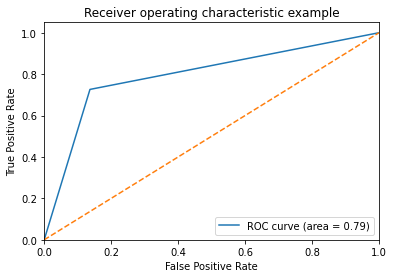

In [62]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1], '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()